In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [68]:
df=pd.read_excel('driver.xlsx')

In [69]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


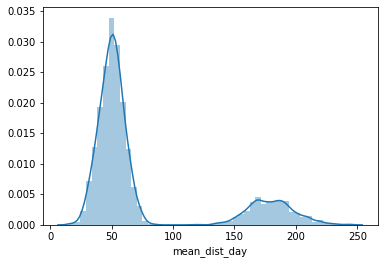

In [70]:
sns.distplot(df['mean_dist_day'])

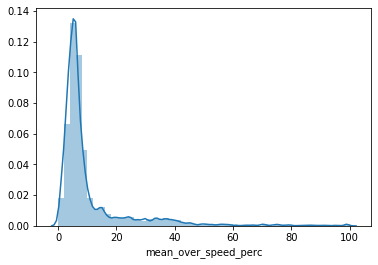

In [71]:
sns.distplot(df['mean_over_speed_perc'])

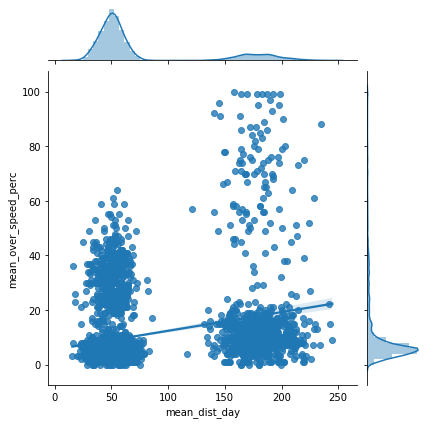

In [72]:
sns.jointplot(data=df,x='mean_dist_day',y='mean_over_speed_perc',kind='reg')

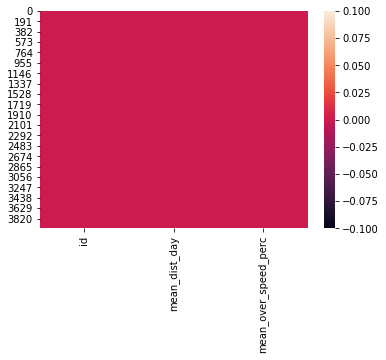

In [73]:
sns.heatmap(df.isnull())

In [74]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [75]:
df.drop('id',axis=1,inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [77]:
np.corrcoef([df['mean_dist_day'],df['mean_over_speed_perc']])

array([[1.        , 0.26689676],
       [0.26689676, 1.        ]])

In [78]:
df['mean_dist_day'].corr(df['mean_over_speed_perc'])

0.2668967587681438

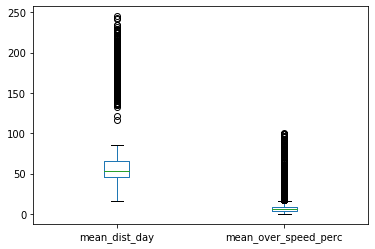

In [79]:
df.plot.box()

In [80]:
df[df['mean_dist_day']>100]

,mean_dist_day,mean_over_speed_perc
3200,179.22,95
3201,192.34,69
3202,140.25,92
3203,184.28,70
3204,200.58,50
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [127]:
kmeans=KMeans(n_clusters=4)

In [128]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
kmeans.cluster_centers_

array([[1.80343118e+02, 1.05201149e+01, 1.00000000e+00],
       [4.99926325e+01, 5.20447169e+00, 8.88178420e-16],
       [1.77835096e+02, 7.02884615e+01, 2.00000000e+00],
       [5.04048244e+01, 3.23653396e+01, 6.93889390e-16]])

In [130]:
import mglearn

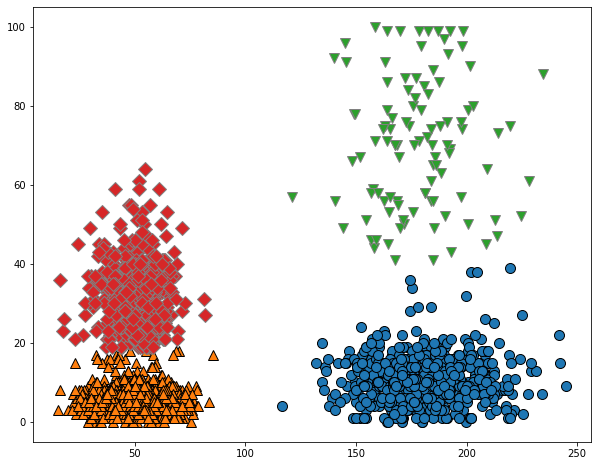

In [137]:
pl.figure(figsize=(10,8))
mglearn.discrete_scatter(df.iloc[:,0],df.iloc[:,1],kmeans.labels_)
pl.show()

In [132]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([ 696, 2773,  104,  427], dtype=int64))

In [133]:
df['clusters']=kmeans.labels_

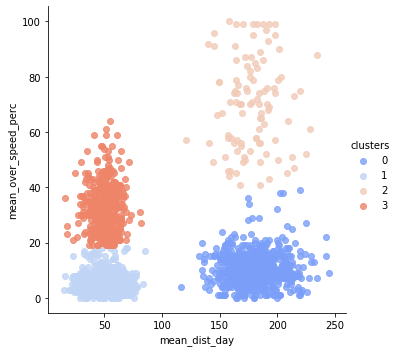

In [134]:
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df,fit_reg=False,
          palette='coolwarm',hue='clusters')